#0.
Intro. a la Intro. de Machine Learning

Qué sabemos ?

1. Supervisado vs No Supervisado
2. Regresion vs Clasificacion

In [18]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

#1. Intro. a dimensiones.

En los problemas del dia a dia nos encontramos usualmente con problemas de una, dos o tres dimensiones.
Conocemos sus gráficos para visualizar, técnicas para calcular distancias o posiciones, y maneras de "mapear" o transformar de una dimension a otra.
Pero, qué pasa cuando tenemos 4, 5,...1000 dimensiones ?

Cuando nos encontramos con este problema, necesitamos usar tecnicas de reducción de dimensionalidad.
Existen muchas técnicas de reducción; Missing Values, Low Variance, Decision Trees, Random Forest, High Correlation, Backward Feature Elimination, Factor Analysis, entre otras.

Cuáles son los beneficios de la Reducción de Dimensionalidad ?
- Ayuda a comprimir datos y, con esto, el espacio necesario para almacenarlos.
- Reduce el tiempo de procesamiento para los mismos computos. Menos dimensiones = menos tiempo de procesamiento
- Nos permite usar algoritmos que no podriamos usar con muchas dimensiones
- Ayuda a eliminar features innecesarias
- Nos ayuda a visualizar


La primera que veremos se llama PCA (Principal Component Analysis).

- Qué es PCA ?

Es un método para comprimir muchos datos con multiples dimensiones a algo en que podamos capturar la "esencia" de los datos, para poder asi visualizarla y representarla de manera más interpretable, por medio de la selección de las componentes más importantes o influyentes de los datos que tenemos.

Leer la documentacion en: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

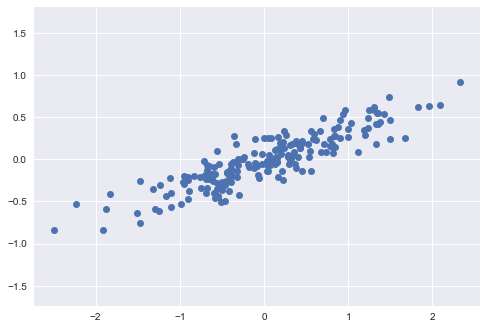

In [19]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)


[ 0.75871884  0.01838551]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


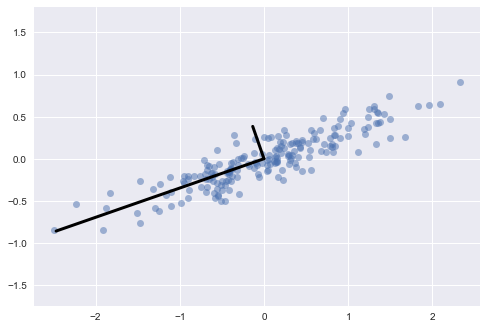

In [21]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

In [22]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


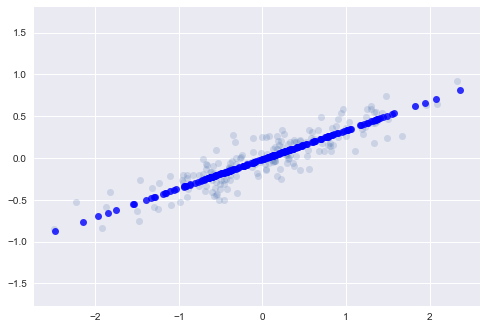

In [23]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
# Pero, que es ese alpha que esta metido ahi ?
# Leer https://es.wikipedia.org/wiki/Alfa_de_Cronbach
plt.axis('equal');

Otro ejemplo de lo que hace el algoritmo PCA, pero ahora de 3d a 2D: 
http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py


Una vez que logramos reducir dimensionalidades, nos toca buscar patrones, grupos o similitudes entre los datos. Ahora viene la parte de "clustering" o "agrupacion" de la informacion que tenemos.

Existen muchas tecnicas para hacer clusters; podemos usar tecnicas de densidad, de centroides, de distribucion, entre otras.
Para esta Tarea, nos enfocaremos en un tipo especifico de clusters por centroides, llamado K-Means.


- Qué es K-means ?

Es un metodo de agrupamiento con el objetivo de particionar n observaciones en k grupos.

Parametro de agrupamiento ? Valor medio (o distancia euclediana)






Visualizaciones de K-Means:

1: http://www.nntext.com/project3/

2: http://www.nntext.com/project1/


In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

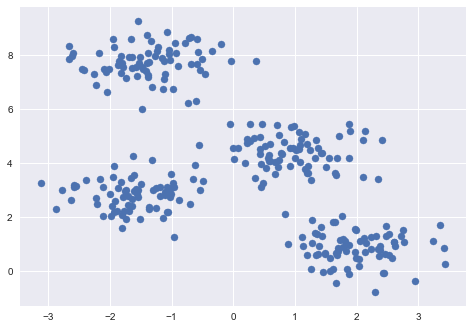

In [25]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

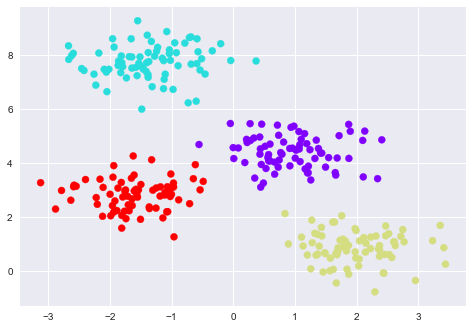

In [26]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

**Ejemplo interesante de K-Means:**
Comprimir imagenes

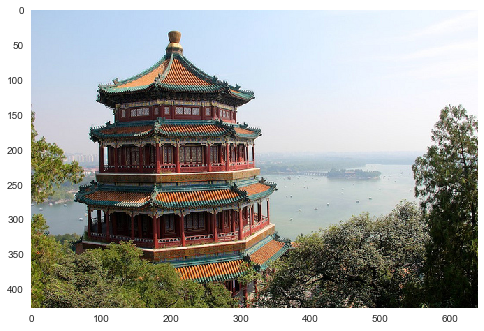

In [27]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False);

In [28]:
china.shape


(427, 640, 3)

In [29]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


In [ ]:
# Para mayor rapidez, reducir el tamaño de china con image = china[::3, ::3]
image = china[::3, ::3]
n_colors = 64

X = (image / 255.0).reshape(-1, 3)
    
model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

Por ultimo, t-SNE

Nota interesante: http://distill.pub/2016/misread-tsne/

Documentacion: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Otra lectura interesante: https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/

Before diving in: if you haven’t encountered t-SNE before, here’s what you need to know about the math behind it. The goal is to take a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space, typically the 2D plane. The algorithm is non-linear and adapts to the underlying data, performing different transformations on different regions. Those differences can be a major source of confusion.


In [ ]:
import sklearn
from sklearn.manifold import TSNE

Para leer; es la reducción de información una buena practica ? 

Depende, https://discuss.analyticsvidhya.com/t/dimensionality-reduction-is-good-or-bad/2444/4